In [1]:
from HeadMoves import *
from Bandwidth import *
from DDP import *
from DDPOnline import *
from Bola3d import *
from Video import *
import matplotlib.pyplot as plt




In [2]:
def calc_reward(solution, buffer, download_time, delta,  probs, video, gamma):
    ddp_n = 0
    for m in solution:
        if m > 0:
            ddp_n += 1
    y = max(download_time - buffer, 0)
    buffer = max(buffer - download_time, 0) + ddp_n * video.delta
    expected_vals_dp = 0
    for i in range(D):
        expected_vals_dp += probs[i] * video.values[solution[i]]
    r0 = gamma * (delta) + expected_vals_dp
    if ddp_n > 0:
        return r0, buffer
    else:
        return 0, buffer




In [5]:
print("Calculating optimal offline")
# ddp.train(headMovements.get_all_probs())
# optimal_offline  = ddp.get_optimal_reward()
# print("Offline: ", optimal_offline)



Calculating optimal offline


In [6]:
print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))

Bola: r = 0.1675201007614917, time=89.44000000021764, b=5, r_0=14.982997812144276
DPP: r = 0.04781181270605962, time=627.4599999886185, b=20, r_0=30.0


In [7]:
print(ddp_solutions)

[[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]


In [8]:
print(bola_solutions)

[[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1]]


In [9]:
print(np.average(ddp_solutions))

2.0


In [10]:
print(np.average(bola_solutions))

0.11904761904761904


In [11]:
number_of_downloaded_tiles_ddp = 0
for v in ddp_solutions:
    number_of_downloaded_tiles_ddp += np.sum(v)
print(number_of_downloaded_tiles_ddp)

160


In [12]:
number_of_downloaded_tiles_bola = 0
for v in bola_solutions:
    if np.sum(v) > 0:
        number_of_downloaded_tiles_bola += np.sum(v)
print(number_of_downloaded_tiles_bola)

20


In [6]:

# v = S

N = 20
D = 4
M = 3
buffer_sizes = range(5, 20, 1)
delta = 5
gamma = 2
t_0 = delta / 10
wait_time = t_0
bandwidth_error = 0.10
sizes = np.array([i for i in range(M)]) * 10
v_coeff = 1
values = np.array([i for i in range(M)]) * 10

min_band = 0.1
max_band = 3


# bola3d = Bola3d(video, gamma, v_coeff)
# ddp = DDP(video,buffer_size, bandwidth, gamma, t_0)
# ddp_online = DDPOnline(video,buffer_size, bandwidth, gamma, t_0)



In [8]:

bola_performance = []
ddpO_performance = []
bola_solutions = {}
ddp_solutions = {}
max_bands = np.arange(0.2, 8, 0.2)
times_bola = []
times_ddp = []
buffer_levels_bola = {}
buffer_levels_ddp = {}
time_levels_bola = {}
time_levels_ddp = {}
for buffer_size in buffer_sizes:
    video = Video(N, delta, D, values, sizes, buffer_size)
    bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 1000, error_rate=bandwidth_error)
    headMovements = HeadMoves(N, D)
    time_bola = 0
    buffer_bola = 0
    reward_bola = 0
    bola_solutions[buffer_size] = []
    ddp_solutions[buffer_size] = []
    buffer_levels_bola[buffer_size] = []
    buffer_levels_ddp[buffer_size] = []
    time_levels_bola[buffer_size] = []
    time_levels_ddp[buffer_size] = []

    time_dp = 0
    buffer_dp = 0
    reward_dp = 0
    bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 1000, error_rate=bandwidth_error)
    bola3d = Bola3d(video, gamma, v_coeff)
    ddp_online = DDPOnline(video, buffer_size, bandwidth, gamma, t_0)
    print(buffer_size)
    n = 0
    while True:
        if n >= N:
            break
        time_levels_ddp[buffer_size].append(time_dp)
        buffer_levels_ddp[buffer_size].append(buffer_dp)
        print("ddP: n: ", n)
        probs = headMovements.get_probs(n)
#         print("probs: ", probs)
#         print("time: ", time_dp)
        #print("getting DP action")
        ddp_action = ddp_online.get_action(probs, time_dp, buffer_dp, reward_dp)
#         print("n: " ,n ,"\tDDP-On action: ", ddp_action)
        if np.sum(ddp_action) > 0:
            download_time_dp = bandwidth.download_time(ddp_action, time_dp, video)
            n+= 1
        else:
            download_time_dp = wait_time
        time_dp += download_time_dp
        r_dp, buffer_dp = calc_reward(ddp_action, buffer_dp, download_time_dp, delta, probs, video, gamma)
        ddp_solutions[buffer_size].append(ddp_action)
        reward_dp =+ r_dp
    times_ddp.append(time_dp)
    n = 0
    while True:
        if n >= N:
            break
        time_levels_bola[buffer_size].append(time_bola)
        buffer_levels_bola[buffer_size].append(buffer_bola)
        print("Bola n: ", n)
        probs = headMovements.get_probs(n)

        # print("getting bola action")
        bola_action = bola3d.get_action(probs)
        bola_solutions[buffer_size].append(bola_action)
        # print("getting DP action")

        if np.sum(bola_action) > 0:
            download_time_bola = bandwidth.download_time(bola_action, time_bola, video)
            bola3d.take_action(bola_action, n, time_bola)
            n += 1
        else:
            download_time_bola = wait_time
            bola3d.take_action(bola_action, n, time_bola)
        time_bola += download_time_bola

        reward_bola, buffer_bola = calc_reward(bola_action, buffer_bola, download_time_bola, delta, probs, video, gamma)

    bola_performance.append(reward_bola/ time_bola)
    ddpO_performance.append(reward_dp/ time_dp)
    times_bola.append(time_bola)

# print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
# print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))


# plt.plot(max_bands, bola_performance, label="Bola360")
# plt.plot(max_bands, ddpO_performance, label="DDP-Online")
# plt.legend()
# plt.xlabel("Bandwidth's average")
# plt.title("Objective values of Bola360 vs DDP-Online")
# plt.savefig("bandwidth_change.png", dpi=600)



5
ddP: n:  0
ddP: n:  1
ddP: n:  2
ddP: n:  3
ddP: n:  4
ddP: n:  5
ddP: n:  6
ddP: n:  7
ddP: n:  8
ddP: n:  9
ddP: n:  10
ddP: n:  11
ddP: n:  12
ddP: n:  13
ddP: n:  14
ddP: n:  15
ddP: n:  16
ddP: n:  17
ddP: n:  18
ddP: n:  19
Bola n:  0
Bola n:  1
Bola n:  1
Bola n:  2
Bola n:  2
Bola n:  3
Bola n:  3
Bola n:  4
Bola n:  4
Bola n:  5
Bola n:  5
Bola n:  6
Bola n:  6
Bola n:  7
Bola n:  7
Bola n:  8
Bola n:  8
Bola n:  9
Bola n:  9
Bola n:  10
Bola n:  10
Bola n:  11
Bola n:  11
Bola n:  12
Bola n:  12
Bola n:  13
Bola n:  13
Bola n:  14
Bola n:  14
Bola n:  15
Bola n:  15
Bola n:  16
Bola n:  16
Bola n:  17
Bola n:  17
Bola n:  18
Bola n:  18
Bola n:  19
Bola n:  19
6
ddP: n:  0
ddP: n:  1
ddP: n:  2
ddP: n:  3
ddP: n:  4
ddP: n:  5
ddP: n:  6
ddP: n:  7
ddP: n:  8
ddP: n:  9
ddP: n:  10
ddP: n:  11
ddP: n:  12
ddP: n:  13
ddP: n:  14
ddP: n:  15
ddP: n:  16
ddP: n:  17
ddP: n:  18
ddP: n:  19
Bola n:  0
Bola n:  1
Bola n:  2
Bola n:  2
Bola n:  3
Bola n:  4
Bola n:  5
Bola n:  5

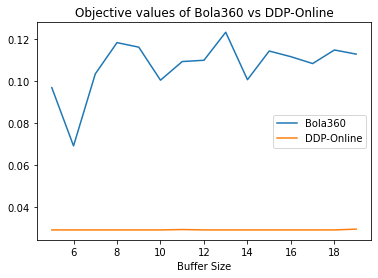

In [15]:
plt.plot(buffer_sizes, bola_performance, label="Bola360")
plt.plot(buffer_sizes, ddpO_performance, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer Size")
plt.title("Objective values of Bola360 vs DDP-Online")
plt.savefig("buffer_change.png", dpi=600)
plt.show()

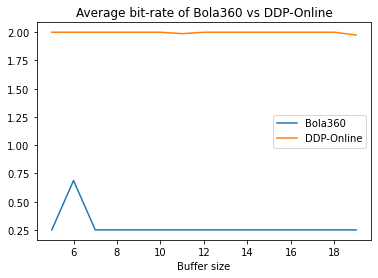

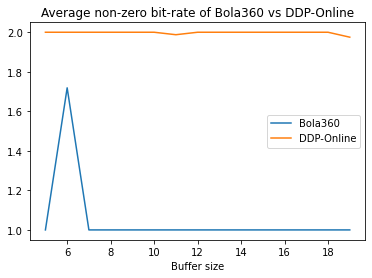

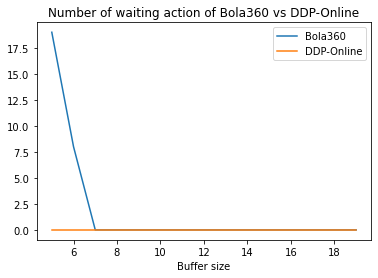

In [16]:
avg_bit_bola = []
avg_bit_ddp = []
avg_downloaded_bit_bola = []
avg_downloaded_bit_ddp = []
n_zero_bola = []
n_zero_ddp = []
for m in buffer_sizes:
    non_zero_sols_bola = []
    n_zero = 0
    for v in bola_solutions[m]:
        if np.sum(v) > 0:
            non_zero_sols_bola.append(v)
        else:
            n_zero += 1
    avg_bit_bola.append(np.average(non_zero_sols_bola))
    n_zero_bola.append(n_zero)
    vals = []
    for sol in non_zero_sols_bola:
        for v in sol:
            if v > 0:
                vals.append(v)
    avg_downloaded_bit_bola.append(np.average(vals))

for m in buffer_sizes:
    non_zero_sols_ddp = []
    n_zero = 0
    for v in ddp_solutions[m]:
        if np.sum(v) > 0:
            non_zero_sols_ddp.append(v)
        else:
            n_zero += 1
    n_zero_ddp.append(n_zero)
    avg_bit_ddp.append(np.average(non_zero_sols_ddp))    
    vals = []
    for sol in non_zero_sols_ddp:
        for v in sol:
            if v > 0:
                vals.append(v)
    avg_downloaded_bit_ddp.append(np.average(vals))
    
plt.plot(buffer_sizes, avg_bit_bola, label="Bola360")
plt.plot(buffer_sizes, avg_bit_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer size")
plt.title("Average bit-rate of Bola360 vs DDP-Online")
plt.savefig("buffer_change_avgbit.png", dpi=600)
plt.show()

plt.plot(buffer_sizes, avg_downloaded_bit_bola, label="Bola360")
plt.plot(buffer_sizes, avg_downloaded_bit_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer size")
plt.title("Average non-zero bit-rate of Bola360 vs DDP-Online")
plt.savefig("buffer_change_avgbit_nonzero.png", dpi=600)
plt.show()

plt.plot(buffer_sizes, n_zero_bola, label="Bola360")
plt.plot(buffer_sizes, n_zero_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer size")
plt.title("Number of waiting action of Bola360 vs DDP-Online")
plt.savefig("buffer_change_nZero.png", dpi=600)
plt.show()

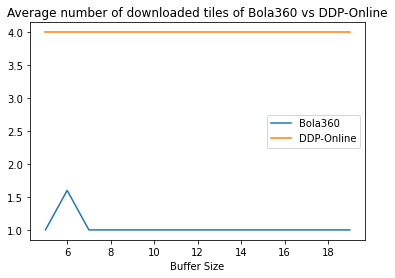

In [17]:
avg_tiles_bola = []
avg_tiles_ddp = []
for m in buffer_sizes:
    tiles=  0
    for v in bola_solutions[m]:
        if np.sum(v) > 0:
            for t in v:
                if t > 0:
                    tiles += 1
    avg_tiles_bola.append(tiles / N)
                

for m in buffer_sizes:
    tiles=  0
    for v in ddp_solutions[m]:
        if np.sum(v) > 0:
            for t in v:
                if t > 0:
                    tiles += 1
    avg_tiles_ddp.append(tiles / N)   
    
plt.plot(buffer_sizes, avg_tiles_bola, label="Bola360")
plt.plot(buffer_sizes, avg_tiles_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer Size")
plt.title("Average number of downloaded tiles of Bola360 vs DDP-Online")
plt.savefig("buffer_change_tiles.png", dpi=600)
plt.show()

In [17]:
bola_solutions

{0.2: [[1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 1, 0, 0]],
 0.4: [[1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 0, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 1, 0

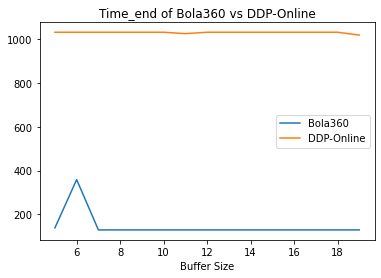

In [18]:

plt.plot(buffer_sizes, times_bola, label="Bola360")
plt.plot(buffer_sizes, times_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Buffer Size")
plt.title("Time_end of Bola360 vs DDP-Online")
plt.savefig("buffer_change_TimeEnd.png", dpi=600)
plt.show()